
![alt text](https://i.imgur.com/HWXuFrR.png)

The outbreak of COVID-19 is developing into a major international crisis, and it's starting to influence important aspects of daily life. For example in India:

- **Travel:** India bans entry of Indians from EU, Turkey and UK, corporate travel has been reduced, and flight fares have dropped.
- **Grocery stores:** In highly affected areas, people are starting to stock up on essential goods.
- Shutdown of malls, pubs, movie theatre

We need a strong model that predicts how the virus could spread across different countries and regions. The goal of this task is to build a model that predicts the spread of the virus in the next 7 days.

**22nd March Afternoon**
India reports its fourth death with 325 total confirmed cases due to COVID-19. Fresh cases from Bihar, Gujrat, Madhya Pradhesh, Odhisha and West Bengal have been reported by the Union Ministry of Health and Family Welfare. India’s 5th death case was recorded in Bihar, with previous death cases reported in Punjab, Maharashtra, Karnataka and Delhi. 
 ![alt text](https://i.imgur.com/oqy4Xhu.png)


As the coronavirus outbreak continues to spread in the country, the question that we as Indians are trying to answer is : 

###**"Will India be able to tackle this pandemic or are we going to witness another Italy/ S.Korea/ Wuhan?"**

In [0]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

# Part 1: Analysing the present condition in India

The first **COVID-19** case was reported on 30th January 2020 when a student arrived **Kerala** from Wuhan. Just in next 2 days, Kerela reported 2 more cases. For almost a month, no new cases were reported in India, however, on 2nd March 2020, five new cases of corona virus were reported in Kerala again and since then the cases have been rising affecting **23** states, till now *(Bihar being the most recent)*. Here is a brief timeline of the cases in India.

 <br>


![](https://i.imgur.com/jKUXVQO.png)

# Recent COVID-19 cases in India:
**21st March**
- **West Bengal** government orders shutting down of all restaurants, pubs, bars, amusement park, museum and zoo till March 31st in wake of corona virus pandemic 
- **Govt caps** maximum retail price of 200ml **hand sanitizer at Rs 100** till June
- **Janata curfew:** 3,700 trains cancelled on Sunday
- Bollywood singer **Kanika Kapoor** tests positive for COVID-19, brings political class under corona scare


# Reading the Datasets


In [64]:
#Learn how to read a .xls file by creating a dataframe using pandas
# Reading the datasets
df= pd.read_excel('/Covid cases in India.xlsx')
df_india = df.copy()
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,3,0,0,0
1,2,Chhattisgarh,1,0,0,0
2,3,Delhi,26,1,5,1
3,4,Gujarat,14,0,0,0
4,5,Haryana,3,14,0,0
5,6,Himachal Pradesh,2,0,0,0
6,7,Karnataka,20,0,2,1
7,8,Kerala,45,7,3,0
8,9,Madhya Pradesh,4,0,0,0
9,10,Maharashtra,60,3,0,2


In [0]:
# Coordinates of India States and Union Territories
India_coord = pd.read_excel('/Indian Coordinates.xlsx')

#Day by day data of India, Korea, Italy and Wuhan
dbd_India = pd.read_excel('/per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_Italy = pd.read_excel('/per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel('/per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel('/per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")



## 1.1 COVID19 Cases in India

In [66]:
#Learn how to play around with the dataframe and create a new attribute of 'Total Case'
#Total case is the total number of confirmed cases (Indian National + Foreign National)

df.drop(['S. No.'],axis=1,inplace=True)
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']
total_cases = df['Total cases'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020):', total_cases)


Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020): 325


In [67]:
#Learn how to highlight your dataframe
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,3,0,0,0,3
1,Chhattisgarh,1,0,0,0,1
2,Delhi,26,1,5,1,27
3,Gujarat,14,0,0,0,14
4,Haryana,3,14,0,0,17
5,Himachal Pradesh,2,0,0,0,2
6,Karnataka,20,0,2,1,20
7,Kerala,45,7,3,0,52
8,Madhya Pradesh,4,0,0,0,4
9,Maharashtra,60,3,0,2,63


**Visualization Inference:** 
* Bihar reports its first case/death
* Maharashtra has the highest number of confirmed cases of Indian National followed by Kerala.
* Haryana has the highest count of confirmed Foreign National count.
* Till 21st of March 4 people have died in India
* Maharashtra, Kerala, Delhi, and Uttar Pradesh are TOP 3 states with maximum number of confirmed cases
* Delhi, Karnataka and Maharashtra have reported death records

## 1.2 Number of Active COVID-19 cases in affected State/Union Territories   

In [68]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 295


,Total Active
Name of State / UT,
Maharashtra,61
Kerala,49
Rajasthan,21
Delhi,21
Telengana,20
Haryana,17
Karnataka,17
Uttar Pradesh,16
Gujarat,14


## 1.4 Visualising the spread geographically

In [69]:
# Learn how to use folium to create a zoomable map

df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.8, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

## 1.5 Confirmed vs Recovered figures

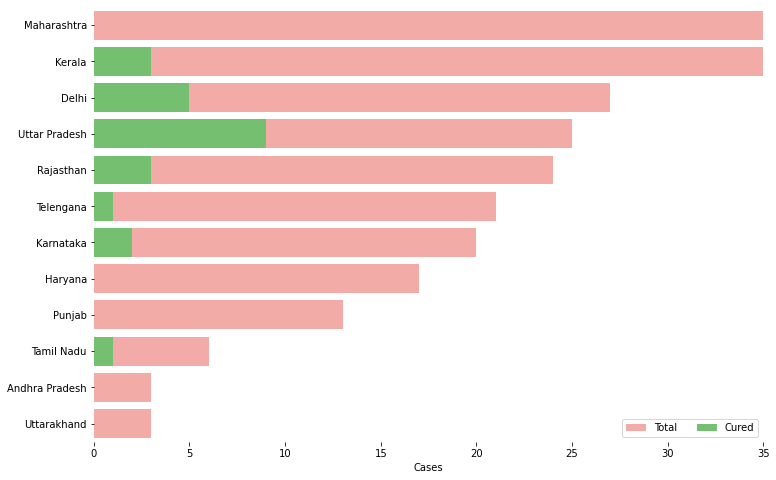

In [70]:
#Learn how to use Seaborn for visualization
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

## 1.6 How the Coronavirus cases are rising?

In [0]:
#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'

In [72]:
#Learn how to create interactive graphs using plotly
# import plotly.graph_objects as go
# Rise of COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y = dbd_India['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# New COVID-19 cases reported daily in India

import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

# Part 2: Is the trend similar to Italy/ S.Korea/ Wuhan?

India has already crossed 100 cases. It is very important to contain the situation in the coming week.The numbers of coronavirus patients starting doubling after these countries hit the 100 mark and almost starting increasing exponentially.


## 2.1 Cumulative cases in India, Italy, S.Korea, and Wuhan

In [73]:
# import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_Wuhan, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Wuhan', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

## 2.2 Comparison between the rise of cases in Wuhan, S.Korea, Italy and India

In [74]:
#Learn how to create subplots using plotly
# import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy", "India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),2, 1)

# fig.add_trace(go.Bar(x=dbd_Wuhan['Date'], y=dbd_Wuhan['Total Cases'],
#                     marker=dict(color=dbd_Wuhan['Total Cases'], coloraxis="coloraxis")),2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [75]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{"colspan": 2}, None]], subplot_titles=("S.Korea","Italy", "India"))

fig.add_trace(go.Scatter(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'], marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")), 1, 1)

fig.add_trace(go.Scatter(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'], marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")), 1, 2)

fig.add_trace(go.Scatter(x=dbd_India['Date'], y=dbd_India['Total Cases'], marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")), 2, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Trend of Coronavirus cases")

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

## 2.3 Trend after crossing 100 cases

In [76]:
# import plotly.graph_objects as go

title = 'Main Source for News'
labels = ['S.Korea', 'Italy', 'India']
colors = ['rgb(122,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)']

mode_size = [10, 10, 12]
line_size = [1, 1, 8]

fig = go.Figure()


fig.add_trace(go.Scatter(x=dbd_Korea['Days after surpassing 100 cases'], 
                 y=dbd_Korea['Total Cases'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True,
    ))
fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'], 
                 y=dbd_Italy['Total Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True,
    ))

fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'], 
                 y=dbd_India['Total Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),            
                 connectgaps=True,
    ))
    
    
    
annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Days after crossing 100 cases ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')

fig.show()


**Visualization Inference:** 

* Above graph depicts the number of days after the COVID-19 cases crosses 100 vs total number of cases in each country. 
* Both Italy and S.Korea have crossed the mark of 5600 in the next 13 days.
* Number of cases detected(trend) in India is less as compared to Italy and S.Korea

Let's use time series and try to predict "Is India moving in the same direction"?

#Why is India testing so little?
[CNN Report](hhttps://www.bbc.com/news/amp/world-asia-india-51922204)
###**Why is a densely populated country with more than a billion people testing so little?** 

The official assumption is the disease has still not spread in the community. As early "evidence" health authorities say 826 samples collected from patients suffering from acute respiratory disease from 50 government hospitals across India between 1 and 15 March tested negative for coronavirus. Also, hospitals have not yet reported a spike in admissions of respiratory distress cases.

"It is reassuring that at the moment there is no evidence of community outbreak," says Balram Bhargava, director of the Indian Council of Medical Research (ICMR). He believes Mr Ghebreyesus's advice is "premature" for India, and it would only "create more fear, more paranoia and more hype".

**But experts are not so sure.**

Many of them believe India is also testing below scale because it fears that its under-resourced and uneven public health system could be swamped by patients. India could be buying time to stock up on testing kits and add isolation and hospital beds. "I know mass testing is not a solution, but our testing appears to be too limited. We need to quickly expand to restrict community transmission," K Sujatha Rao, former federal health secretary and author of But Do We Care: India's Health System.

**India** has eight doctors per 10,000 people compared to 41 in **Italy** and 71 in **Korea**. It has one state-run hospital for more than 55,000 people. (Private hospitals are out of reach for most people). India has a poor culture of testing, and most people with flu symptoms do not go to doctors and instead try home remedies or go to pharmacies. There's a scarcity of isolation beds, trained nursing staff and medics, and ventilators and intensive care beds.
###India poor testing rate masked coronavirus cases: [Report](https://www.aljazeera.com/news/2020/03/india-poor-testing-rate-masked-coronavirus-cases-200318040314568.html)


#It’s time to start what we really wanted to do all along!

#Part 3:  Exploring World wide data


In [0]:
df = pd.read_csv('/covid_19_data.csv',parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("/time_series_covid_19_confirmed.csv")
df_recovered = pd.read_csv("/time_series_covid_19_recovered.csv")
df_deaths = pd.read_csv("/time_series_covid_19_deaths.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [78]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,4,5,6,6,6,6,6,6,6,6,10,10,15,16,19,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
df.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [80]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['SNo', 'Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,SNo,Confirmed,Deaths,Recovered
0,01/22/2020,Hong Kong,Hong Kong,13,0.0,0.0,0.0
1,01/22/2020,Macau,Macau,21,1.0,0.0,0.0
2,01/22/2020,Mainland China,Anhui,1,1.0,0.0,0.0
3,01/22/2020,Mainland China,Beijing,2,14.0,0.0,0.0
4,01/22/2020,Mainland China,Chongqing,3,6.0,0.0,0.0


In [81]:
# Check for India's data
df.query('Country=="India"').groupby("Last Update")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Last Update,Confirmed,Deaths,Recovered
0,2020-01-30 16:00:00,1.0,0.0,0.0
1,2020-01-31 08:15:00,1.0,0.0,0.0
2,2020-01-31 23:59:00,1.0,0.0,0.0
3,2020-02-02 06:03:08,2.0,0.0,0.0
4,2020-02-03 21:43:02,30.0,0.0,0.0
5,2020-02-13 18:53:02,9.0,0.0,0.0
6,2020-02-16 07:43:02,45.0,0.0,45.0
7,2020-03-02 22:33:09,10.0,0.0,6.0
8,2020-03-04 12:33:03,28.0,0.0,3.0
9,2020-03-05 13:53:03,30.0,0.0,3.0


In [82]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df.groupby('Date').sum().head()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0


# 3.1 Visualizing: Worldwide NCOVID-19 cases  

In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [84]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

In [0]:
df_confirmed = df_confirmed[["Province/State","Lat","Long","Country"]]
df_temp = df.copy()
df_temp['Country'].replace({'Mainland China': 'China'}, inplace=True)
df_latlong = pd.merge(df_temp, df_confirmed, on=["Country", "Province/State"])

In [86]:
fig = px.density_mapbox(df_latlong, lat="Lat", lon="Long", hover_name="Province/State", hover_data=["Confirmed","Deaths","Recovered"], animation_frame="Date", color_continuous_scale="Portland", radius=7, zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases Time Lapse - Confirmed, Deaths, Recovered')

fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


fig.show()

#Part 4: Forecasting Total Number of Cases Worldwide

## Prophet
Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well. 

## Why Prophet?

* **Accurate and fast:**  Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting. Facebook finds it to perform better than any other approach in the majority of cases. It fit models in [Stan](https://mc-stan.org/) so that you get forecasts in just a few seconds.

* **Fully automatic:** Get a reasonable forecast on messy data with no manual effort. Prophet is robust to outliers, missing data, and dramatic changes in your time series.

* **Tunable forecasts:** The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human-interpretable parameters to improve your forecast by adding your domain knowledge

* **Available in R or Python:** Facebook has implemented the Prophet procedure in R and Python. Both of them share the same underlying Stan code for fitting. You can use whatever language you’re comfortable with to get forecasts. 


## References 
- https://facebook.github.io/prophet/
- https://facebook.github.io/prophet/docs/
- https://github.com/facebook/prophet
- https://facebook.github.io/prophet/docs/quick_start.html

In [0]:
from fbprophet import Prophet

In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

The input to Prophet is always a dataframe with two columns: **ds** and **y**. The **ds (datestamp)** column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [0]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [119]:
confirmed.tail()

,ds,y
49,2020-03-11,125865.0
50,2020-03-12,128343.0
51,2020-03-13,145193.0
52,2020-03-14,156099.0
53,2020-03-15,167447.0



##4.1 Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [91]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
56,2020-03-18
57,2020-03-19
58,2020-03-20
59,2020-03-21
60,2020-03-22


The **predict** method will assign each row in future a predicted value which it names **yhat**. If you pass in historical dates, it will provide an in-sample fit. The **forecast object** here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [92]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2020-03-18,148703.893314,133083.448976,163872.775786
57,2020-03-19,152585.478705,136758.801283,169942.080078
58,2020-03-20,157365.812683,140866.259439,171125.313533
59,2020-03-21,161049.269158,145802.813801,176386.175132
60,2020-03-22,165066.852886,151026.271351,179974.561261


You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

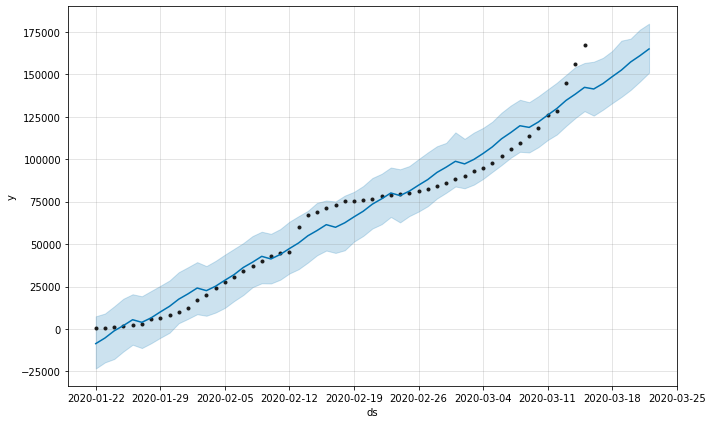

In [93]:
confirmed_forecast_plot = m.plot(forecast)

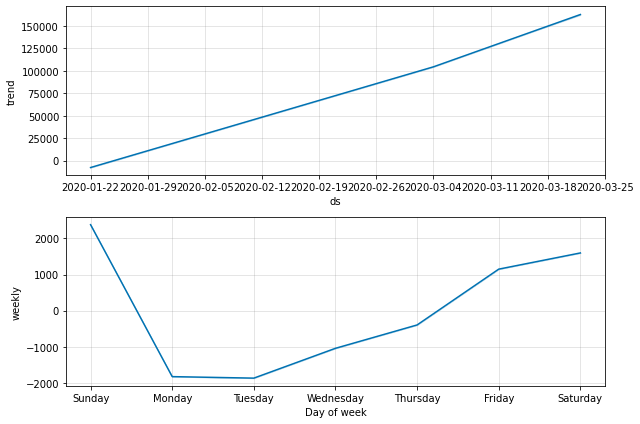

In [94]:
confirmed_forecast_plot =m.plot_components(forecast)

## What do you think was the reason behind Indian government Today's (22nd March) decision?


- **PM Modi's Speech:** Janta Curfew in india today(22nd March). Might be possible that some data scientist insighful forecast.
![alt text](https://i.imgur.com/bP2Rf9b.png)

- No scheduled international commercial flight's paasenger shall be allowed to land in india from March 22 for a week.

![alt text](https://i.imgur.com/P9z3TVL.png)

### Indian streets today!
![alt text](https://i.imgur.com/jIE1kro.jpg)

##4.2 Forecasting Worldwide Deaths using Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [0]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [96]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
56,2020-03-18
57,2020-03-19
58,2020-03-20
59,2020-03-21
60,2020-03-22


In [97]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2020-03-18,6138.425635,5729.142205,6561.250688
57,2020-03-19,6317.279493,5944.881356,6762.118849
58,2020-03-20,6547.994480,6110.854761,6982.864028
59,2020-03-21,6770.709480,6317.544141,7141.016383
60,2020-03-22,7011.341739,6603.949920,7444.460069


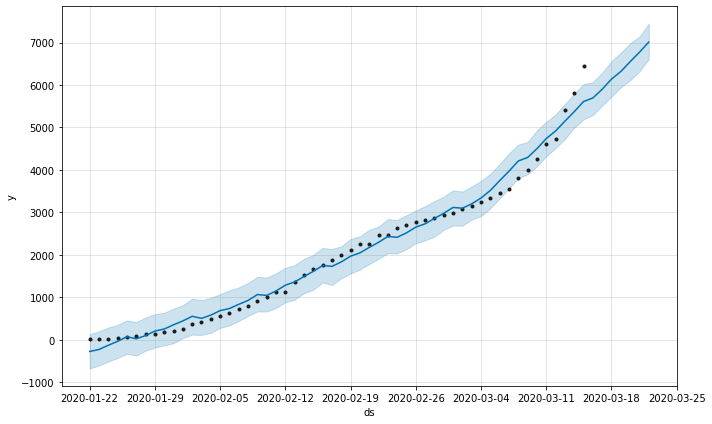

In [98]:
deaths_forecast_plot = m.plot(forecast)

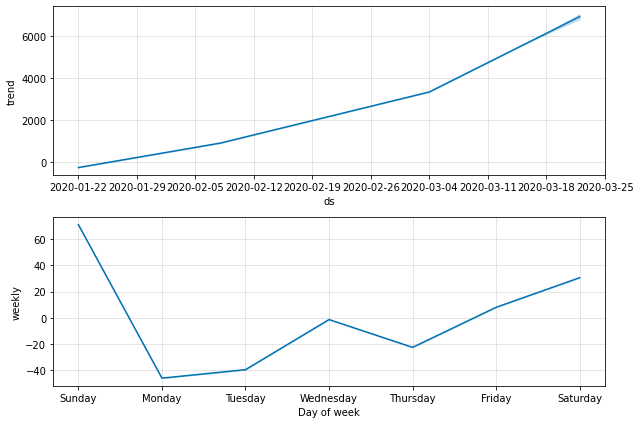

In [99]:
deaths_forecast_plot = m.plot_components(forecast)

##4.3 Forecasting Worldwide Recovered Cases with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [0]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [0]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
56,2020-03-18
57,2020-03-19
58,2020-03-20
59,2020-03-21
60,2020-03-22


In [0]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2020-03-18,81659.035390,80644.150373,82787.850896
57,2020-03-19,83815.186422,82264.405550,85426.038167
58,2020-03-20,85921.056722,83939.840352,88033.407879
59,2020-03-21,88454.886537,85825.769589,91348.885251
60,2020-03-22,90626.029555,87320.141102,94063.429045


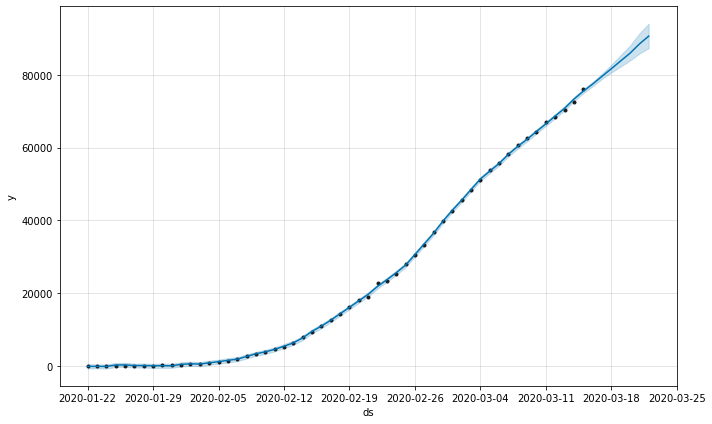

In [0]:
recovered_forecast_plot = m.plot(forecast)

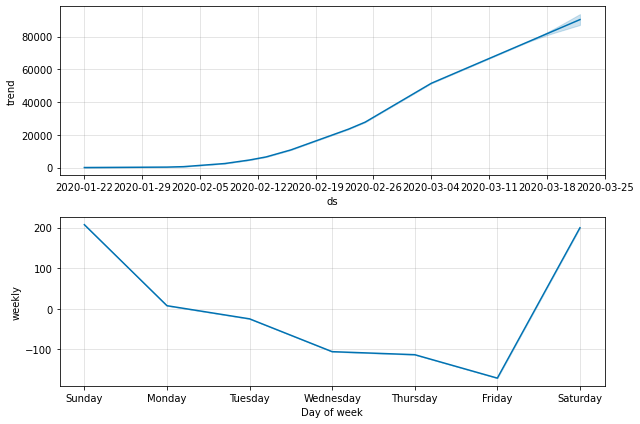

In [0]:
recovered_forecast_plot = m.plot_components(forecast)


##Inference from the above Analysis and Forecast
###Will Indian become the next Italy/ S.Korea/ Wuhan?
Yes, the data says India might become the next Italy/ S.Korea/ Wuhan if we are not taking strict measures against it. 
- Indian government's decision for today confirms that the above prediction is definitely something we pay attention to.
- Thankyou everyone for staying at home/indoors today. This will definitely help us tackle the situation. It won't stop the pandemic, but it would definitely help us reduce the exponential rate at which it is increasing. 
- Let's quarantine ourselves, and save ourselves and others you love.
- Let's give a hand in fighting this pandemic atleast by staying indoors and protecting you and your family. 
- Go and get a checkup done in case you are suffering from cough,cold, fever, shortness of breath and breathing difficulties. Can't tell for sure but(due to lack of data) , but it might be possible that we don't have the exact number of the COVID-19 cases in India becasuse sometimes it takes weeks to see the first sign/symptom for it. 
- If you're not getting the checkup done, you might add in spreading the virus unintentionally
- Its time we take this pandemic seriously - **LIVE & HELP OTHERS LIVE**
- Take precautions, stay indoors, and utilize this time to develop your machine learning skill with edureka's AI-ML PGP and help the world with your machine learning models.

![alt text](https://i.imgur.com/POA1WGb.png)

In [41]:
# Updated Excel Spreadsheet of India:

df_updated= pd.read_excel('/Covid cases in India Updated.xlsx')
df_india_updated = df_updated.copy()
df_india_updated

,S. No.,Name of State / UT,Total Confirmed cases,Cured,Death,Unnamed: 5
0,1,Andhra Pradesh,11,1,0,NaN
1,2,Chhattisgarh,1,0,0,NaN
2,3,Delhi,35,6,1,NaN
3,4,Gujarat,38,0,2,NaN
4,5,Haryana,30,11,0,NaN
5,6,Himachal Pradesh,3,0,1,NaN
6,7,Karnataka,41,3,1,NaN
7,8,Kerala,118,4,0,NaN
8,9,Madhya Pradesh,15,0,1,NaN
9,10,Maharashtra,124,1,3,NaN


In [42]:
df_india_updated.sum()

S. No.                                                                 276
Name of State / UT       Andhra PradeshChhattisgarhDelhiGujaratHaryanaH...
Total Confirmed cases                                                  642
Cured                                                                   43
Death                                                                   13
Unnamed: 5                                                               0
dtype: object

In [44]:
df= pd.read_excel('/Covid cases in India.xlsx')
df_india = df.copy()
df.sum()

S. No.                                                                                      276
Name of State / UT                            Andhra PradeshChhattisgarhDelhiGujaratHaryanaH...
Total Confirmed cases (Indian National)                                                     284
Total Confirmed cases ( Foreign National )                                                   41
Cured                                                                                        24
Death                                                                                         6
dtype: object

In [46]:
642 - 325

317

Note that there are 642 total confirmed cases in India as of March 26, 2020. Previously, there were a total of 325 confirmed cases from March 22. This means that there were 317 new cases, where the amount of cases almost doubled within the span of 4 days.

## Question: Which state is the most recent with COVID-19 case?

According to "statista.com", the Indian state of Maharashtra had the highest number of novel coronavirus COVID-19 cases as of March 26, 2020.

## What is the total number of active COVID-19 cases in India?


The total number of active cases, displayed on https://www.worldometers.info/coronavirus/country/india/, is 661 cases out of 722. Within the active cases, 661 (100%) are in mild condition vs. serious or critical condition. 

The latter 61 closed cases have shown 45 patients who have recovered (74%), whereas 16 (26%) of the cases reported deaths.

## Data Visualization of India vs. Iran

In [0]:
## Recall: Here is the code from India. 
## We will use updated excel spreadsheet, since there are different values.

Now, we want to read India and Iran's data from Excel spreadsheet.

In [0]:
#Day by day data of India
dbd_India = pd.read_excel('/per_day_cases_updated.xlsx',parse_dates=True, sheet_name='India')

#Day by day data of Iran
dbd_Iran = pd.read_excel('/per_day_cases_updated.xlsx',parse_dates=True, sheet_name='Iran')

In [62]:
#Learn how to create interactive graphs using plotly
# import plotly.graph_objects as go
# Rise of COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y = dbd_India['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# New COVID-19 cases reported daily in India

import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [61]:
# Rise of COVID-19 cases in Iran
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_Iran['Date'], y = dbd_Iran['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in Iran (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# New COVID-19 cases reported daily in Iran

import plotly.express as px
fig = px.bar(dbd_Iran, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in Iran on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

## Observations of India and Iran

From the above plots, we can observe that both India and Iran have similar growth rates. The key difference, however, is in relation to how the data of Iran, especially in reference to population growth, is thousands of times as large in comparison to India. These results are striking, noting that the population of India is almost double the size of Iran.

## Time-Series Forecasting with Confidence Interval of 97%

Now, we want to do another time-series forecasting prediction. Instead, we will use a confidence interval of 97%, meaning, we are 97 percent confident that the data points within the next 10 days will lie within the given region.

In [0]:
# Study confirmed cases

confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [120]:
# Change interval_width to 0.97 and periods to 10
m = Prophet(interval_width=0.97)
m.fit(confirmed)
future = m.make_future_dataframe(periods=10)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
59,2020-03-21
60,2020-03-22
61,2020-03-23
62,2020-03-24
63,2020-03-25


In [121]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
59,2020-03-21,161049.269158,144663.928265,176667.481181
60,2020-03-22,165066.852886,147543.992768,180078.250774
61,2020-03-23,164093.851029,148354.569701,180186.593493
62,2020-03-24,167286.959389,150501.879975,185673.853431
63,2020-03-25,171347.629646,155042.423947,188312.178029


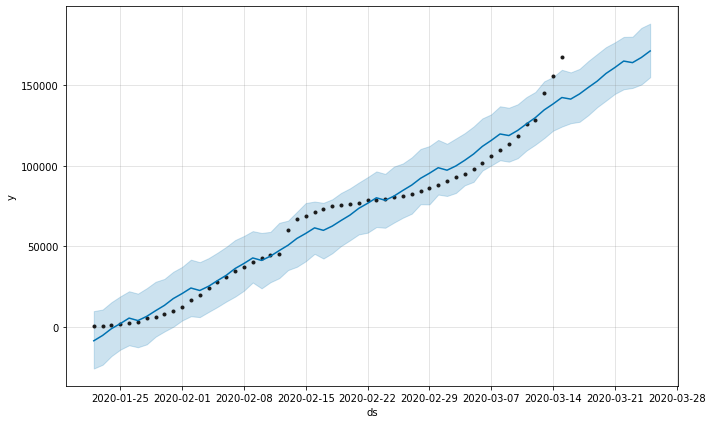

In [122]:
confirmed_forecast_plot = m.plot(forecast)

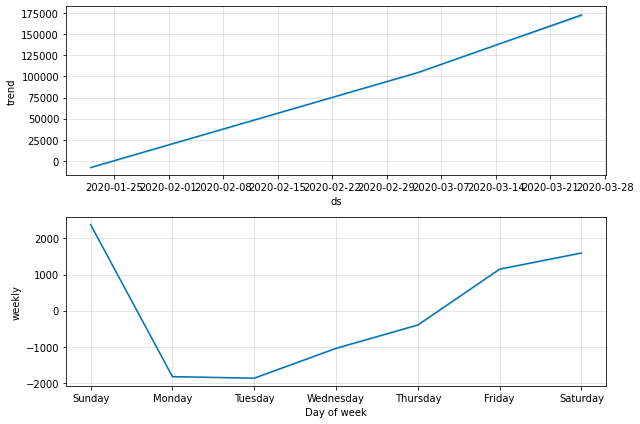

In [123]:
confirmed_forecast_plot =m.plot_components(forecast)

## Worldwide Data Prediction:

From the worldwide data collected about COVID-19, we can see that predicting from the beginning of this course until 10 days after, there are approximately 170,000 cases. However, the report from worldometer shows a largely different find. From the beginning of this course (March 15), the growth rate seemed to be more linear. However, after March 15, we can observe the growth rate increase at a much faster rate. Thus, we can infer that the time-series predictions using "Prophet" were not successful and that artificial intelligence and machine learning may have its faults. This can also be due to the fact that COVID-19 takes time so that the symptoms for the patient with the virus could be revealed. When we ask the question, "Why is our findings falsely predicted?" We have to understand that there are some missing links in our data. Because COVID-19 has just recently become a factor and we have just now become more and more globally aware of the pandemic, we are now more capable of finding more patients wiith COVID-19.


![alt text](https://ourworldindata.org/exports/daily-deaths-covid-19-who_v47_850x600.svg)
